In [12]:
import matplotlib
import numpy as np
import math
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [13]:
sigma0 = 0.5
deltax = 0.02
k0 = 17*np.pi 
deltat = 0.5*deltax*deltax

psi = np.zeros((750,2))

psr = np.zeros((750,2))

rho = np.zeros(750)

xmax = 6.0
xs = np.arange( 0, 15, deltax)
print(xs.shape)
psi[:,0] = (np.exp(-0.5*np.power((xs-5)/sigma0,2))*np.sin(k0*xs))
psr[:,0] = (np.exp(-0.5*np.power((xs-5)/sigma0,2))*np.cos(k0*xs))
#v = 15.0*np.power(xs,2)
v = np.zeros(xs.shape[0])
alpha = 0.5*deltat/(deltax*deltax)
t = 0.5*deltat

(750,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


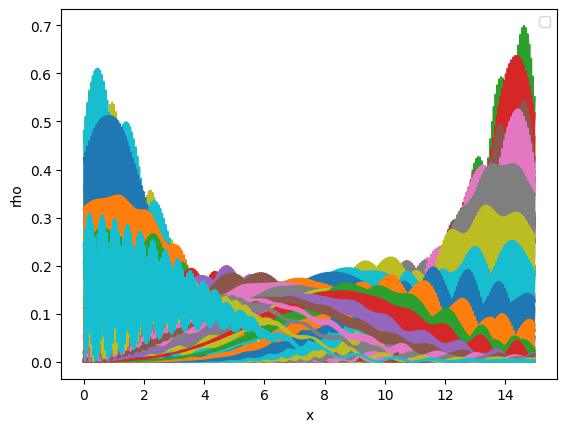

In [46]:

artists = [] #espacio para guardar datos de animación
fig, ax = plt.subplots()
for paso in range(5000):
    t = t + (0.5*deltat)

    if paso%2 == 0:
        #print("PSR inicial", psr)
        psr[0,1] = psr[0,0] - 2*(alpha*(psi[1,0]) - 2*(alpha + v[0]*deltat)*psi[0,0])
        psr[1:-1,1] = psr[1:-1,0] - 2*(alpha*(psi[2:,0]+psi[0:-2,0]) - 2*(alpha + v[1:-1]*deltat)*psi[1:-1,0])
        psr[-1:,1] = psr[-1:,0] - 2*(alpha*(psi[-2:-1,0]) - 2*(alpha + v[-1]*deltat)*psi[-1:,0])
        #print("PSR final", psr)
        rho = np.power(psi[:,0],2)+psr[:,1]*psr[:,0]
        psr[:,0] = psr[:,1]
    else:
        #print("PSI inicial", psi)
        psi[0,1] = psi[0,0] + 2*(alpha*(psr[1,0]) - 2*(alpha + v[0]*deltat)*psr[0,0])
        psi[1:-1,1] = psi[1:-1,0] + 2*(alpha*(psr[2:,0]+psr[0:-2,0]) - 2*(alpha + v[1:-1]*deltat)*psr[1:-1,0])
        psi[-1:,1] = psi[-1:,0] + 2*(alpha*(psr[-2:-1,0]) - 2*(alpha + v[-1]*deltat)*psr[-1:,0])
        #print("PSI final", psi)
        rho = np.power(psr[:,0],2)+psi[:,1]*psi[:,0]
        psi[:,0] = psi[:,1]

    if (paso+1)%100== 0:
        # Plot
        plt.plot(xs, rho)
        container = ax.plot(xs, rho, color ='tab:blue')
        artists.append(container)
ax.set( xlabel='x', ylabel='rho')
ax.legend()        
# Save
ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=100)
ani.save(filename="WavePacket.gif", writer="pillow")
ani.save(filename="WavePacket.apng", writer="pillow")
        # Display
        #plt.show()
        #print("tiempo: ", t)
        #print("posición:", xs)
        #print("Rho:", rho)

In [ ]:
psr[:10,1], psi[:10,1]

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
fig2 = plt.figure()
ax = Axes3D(fig1)
bx = Axes3D(fig2)

for paso in range(5000):
    t = t + (0.5*deltat)
    
    if paso%2 == 0:
        #print("PSR inicial", psr)
        psr[0,1] = psr[0,0] - 2*(alpha*(psi[1,0]) - 2*(alpha + v[0]*deltat)*psi[0,0])
        psr[1:-1,1] = psr[1:-1,0] - 2*(alpha*(psi[2:,0]+psi[0:-2,0]) - 2*(alpha + v[1:-1]*deltat)*psi[1:-1,0])
        psr[-1:,1] = psr[-1:,0] - 2*(alpha*(psi[-2:-1,0]) - 2*(alpha + v[-1]*deltat)*psi[-1:,0])
        #print("PSR final", psr)
        rho = np.power(psi[:,0],2)+psr[:,1]*psr[:,0]
        psr[:,0] = psr[:,1]
    else:
        #print("PSI inicial", psi)
        psi[0,1] = psi[0,0] + 2*(alpha*(psr[1,0]) - 2*(alpha + v[0]*deltat)*psr[0,0])
        psi[1:-1,1] = psi[1:-1,0] + 2*(alpha*(psr[2:,0]+psr[0:-2,0]) - 2*(alpha + v[1:-1]*deltat)*psr[1:-1,0])
        psi[-1:,1] = psi[-1:,0] + 2*(alpha*(psr[-2:-1,0]) - 2*(alpha + v[-1]*deltat)*psr[-1:,0])
        #print("PSI final", psi)
        rho = np.power(psr[:,0],2)+psi[:,1]*psi[:,0]
        psi[:,0] = psi[:,1]

    if (paso+1)%100== 0:
        # Plot
        ax.plot(xs, psi, rho)
        bx.plot(xs, psr, rho)

        plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

ValueError: Argument Z must be 2-dimensional.

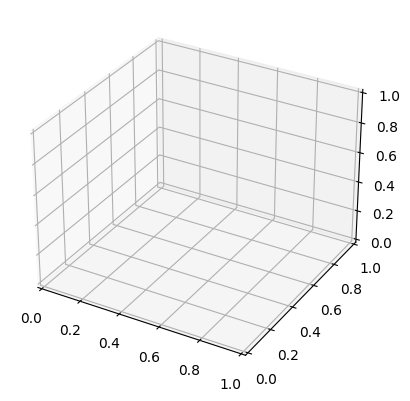

In [45]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = xs
Y = psr
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
Z = rho = np.power(psi[:,0],2)+psr[:,1]*psr[:,0]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()